# ANALISI RFM

Introdotta per la prima volta da _"Bult, Jan & Wansbeek, Tom. (1995). Optimal Selection for Direct Mail. Marketing Science"_, tale tecnica nasce come soluzione pratica per ridurre i costi di stampa e spedizione di cataloghi promozionali ed aumentare il ritorno sull'investimento.

Attraverso la ripartizione dei clienti basata sui valori RFM (***Recency. Frequency, Monetary***), si ha la possibilità di costruire un solido supporto decisionale e previsionale per le strategie di promozione e/o fidelizzazione, andando a scoprire chi sono i nostri migliori clienti, i clienti a rischio di abbandono, le categorie più sensibili alle promozioni o gli acquirenti da cui si potrebbero incrementare i profitti.
Tale modello si basa dunque sul principio che ***fidelizzare i clienti è molto più proficuo rispetto ad attrarne di nuovi***. 

Secondo il principio di Pareto infatti, il 20% delle cause produce l’80% degli effetti, quindi il 20% dei clienti genererà l’80% del fatturato e l’80% dei clienti genererà il 20% dei ricavi. Da ciò si deduce l'importanza di individuare i migliori clienti dello store e utilizzare metodi per fidelizzarli ulteriormente. 

- L'analisi che andremo a svolgere sarà dunque incentrata sulla categorizzazione dei clienti al fine di individuare e trattare i clienti più fedeli e più proficui.

### ATTRIBUTI RFM
- ***Recency***: misura il tempo trascorso dall’ultimo acquisto da un certo cliente. Ci aspettiamo che più questo è vicino, maggiore è la probabilità che quel cliente ci scelga di nuovo in futuro.

- ***Frequency***: riflette il numero di acquisti ripetuti da un cliente. Anche in questo caso, la probabilità di un eventuale acquisto futuro cresce all’aumentare della frequenza.

- ***Monetary***: indica l’ammontare speso dal cliente nel periodo di riferimento. Si può attribuire un senso a tale valore solo se associato ad un'altra delle due features sopra citate.

## IL DATASET

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cleaned_online_retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## DATA PREPARATION

Come già anticipato nel notebook precedente, dato che la provenienza del cliente può avere una influenza sul comportamento, per l'analisi RFM decido di utilizzare esclusivamente i dati generati da clienti residenti nel Regno Unito.

In [3]:
uk_data=data[data.Country=='United Kingdom']

In [4]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354318 entries, 0 to 397865
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354318 non-null  int64  
 1   StockCode    354318 non-null  object 
 2   Description  354318 non-null  object 
 3   Quantity     354318 non-null  int64  
 4   InvoiceDate  354318 non-null  object 
 5   UnitPrice    354318 non-null  float64
 6   CustomerID   354318 non-null  float64
 7   Country      354318 non-null  object 
 8   Sales        354318 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.0+ MB


In [5]:
uk_data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Sales
count,354318.000000,354318.000000,354318.000000,354318.000000,354318.000000
mean,560672.542233,11.575841,2.941028,15552.491575,19.910351
std,13168.864466,42.106303,11.492602,1594.523894,96.075868
min,536365.000000,1.000000,0.001000,12747.000000,0.001000
25%,549241.000000,2.000000,1.250000,14194.000000,4.160000
50%,561900.000000,4.000000,1.950000,15522.000000,10.200000
75%,572295.000000,12.000000,3.750000,16931.000000,17.700000
max,581586.000000,4800.000000,3155.950000,18287.000000,38970.000000


Elimino dal dataset le informazioni non utili al fine delle successive operazioni

In [6]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo',
                 'Quantity','UnitPrice']]

In [7]:
#Creo la variabile TotalPrice moltiplicando il prezzo
#unitario di ogni prodotto per la quantità acquiastata
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

## COSTRUZIONE DATASET RFM

Calcolo, sulla base delle informazioni a disposizione, i dati inerenti ale features RFM

## Recency

In [8]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

('2010-12-01 08:26:00', '2011-12-09 12:49:00')

In [9]:
#Imposto come data odierne il giorno successivo alla data 
#dell'ultimo acquisto e calcolo il tempo trascorso per ogni acquisto
PRESENT = dt.date(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])
uk_data['date'] = pd.DatetimeIndex(uk_data['InvoiceDate']).date
recency_df = uk_data.groupby(by='CustomerID',
                             as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df['Recency'] = recency_df['LastPurchaseDate'
                                  ].apply(lambda x: (PRESENT - x).days)
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)
recency_df.head()

,CustomerID,Recency
0,12747.0,3
1,12748.0,1
2,12749.0,4
3,12820.0,4
4,12821.0,215


## Frequency

In [10]:
#elimino i duplicati in modo da considerare il numero di transazioni
#e non di prodotti acquistati
uk_data_2 = uk_data
uk_data_2.drop_duplicates(subset=['InvoiceNo',
                                  'CustomerID'], inplace=True) 

#Calcolo il numero di transazioni per ogni singolo cliente, 
frequency_df = uk_data_2.groupby(by=['CustomerID'],
                                 as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12747.0,11
1,12748.0,209
2,12749.0,5
3,12820.0,4
4,12821.0,1


## Monetary

In [11]:
uk_data["Total_price"]= uk_data["Quantity"] * uk_data["UnitPrice"]
monetary_df = uk_data.groupby(by='CustomerID',
                              as_index=False)['Total_price'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12747.0,689.49
1,12748.0,3841.31
2,12749.0,98.35
3,12820.0,58.20
4,12821.0,19.92


### Costruisco il dataset RFM tramite merging dei precedenti risultati

In [12]:
rfm = recency_df.merge(frequency_df,on='CustomerID')
rfm = rfm.merge(monetary_df,on='CustomerID')

In [13]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12747.0,3,11,689.49
1,12748.0,1,209,3841.31
2,12749.0,4,5,98.35
3,12820.0,4,4,58.20
4,12821.0,215,1,19.92


In [14]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3919.000000,3919.000000,3919.000000,3919.000000
mean,15562.880327,92.734881,4.246747,228.783315
std,1575.958319,99.482068,7.197966,1352.601845
min,12747.000000,1.000000,1.000000,0.390000
25%,14209.500000,18.000000,1.000000,17.700000
50%,15570.000000,51.000000,2.000000,45.300000
75%,16913.500000,143.000000,5.000000,124.105000
max,18287.000000,374.000000,209.000000,42053.600000


# ANALISI RFM UTILIZZANDO L'ALGORITMO DI CLUSTERING K-MEANS

### Analizzo le distribuzioni al fine di comprendere se possono essere passate ad un algoritmo di clustering così come sono o hanno bisogno di aggiustamenti

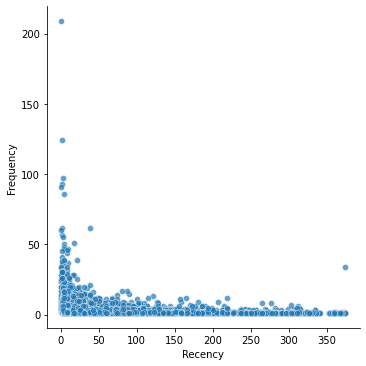

In [15]:
sns.relplot(x="Recency", y="Frequency",
           data=rfm, kind="scatter",
           alpha=0.7)
plt.show()

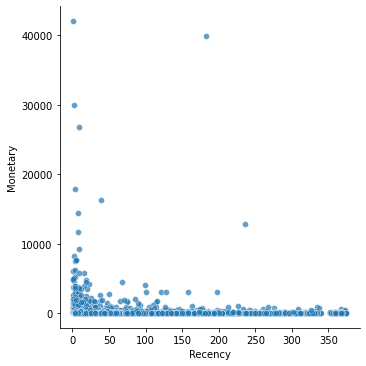

In [16]:
sns.relplot(x="Recency", y="Monetary",
           data=rfm, kind="scatter",
           alpha=0.7)
plt.show()

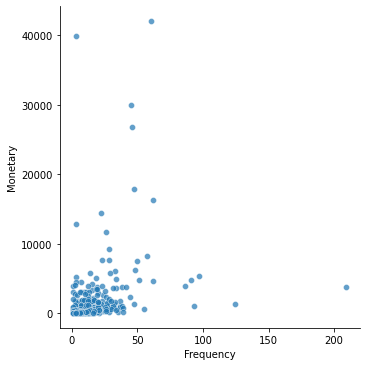

In [17]:
sns.relplot(x="Frequency", y="Monetary",
           data=rfm, kind="scatter",
           alpha=0.7)
plt.show()

Analizzando gli Scatterplot generati dalle tre features RFM, è facile dedurre che un algoritmo di clustering potrebbe non essere in grado di suddividere i dati in maniera ottimale. Questo a causa della eccessiva aggregazione dei punti e della importante presenza di outliers. 
Per risolvere questo problema potremmo ricorrere ad una tecnica di eliminazione o di adeguamento degli outliers.

## Adeguamento outliers

In [18]:
rfm_adjusted_out = rfm.copy()
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(rfm_adjusted_out, "Recency")
replace_with_thresholds(rfm_adjusted_out, "Frequency")
replace_with_thresholds(rfm_adjusted_out, "Monetary")

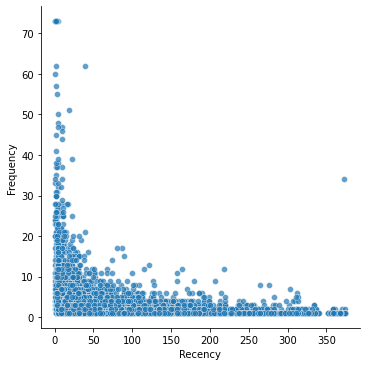

In [19]:
sns.relplot(x="Recency", y="Frequency",
           data=rfm_adjusted_out, kind="scatter",
           alpha=0.7)
plt.show()

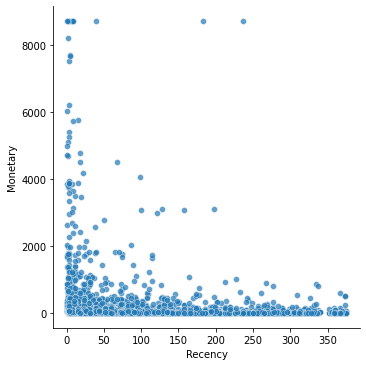

In [20]:
sns.relplot(x="Recency", y="Monetary",
           data=rfm_adjusted_out, kind="scatter",
           alpha=0.7)
plt.show()

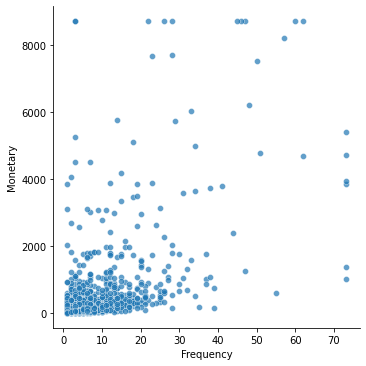

In [21]:
sns.relplot(x="Frequency", y="Monetary",
           data=rfm_adjusted_out, kind="scatter",
           alpha=0.7)
plt.show()

## Eliminazione outliers

In [22]:
rfm_no_out = rfm_adjusted_out.copy()

### Recency

In [23]:
Q1 = rfm_no_out.Recency.quantile(0.25)
Q3 = rfm_no_out.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm_no_out = rfm_no_out[(rfm_no_out.Recency >= 
            (Q1 - 1.5*IQR)) & (rfm_no_out.Recency <= (Q3 + 1.5*IQR))]

### Frequency

In [24]:
Q1 = rfm_no_out.Frequency.quantile(0.25)
Q3 = rfm_no_out.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm_no_out = rfm_no_out[(rfm_no_out.Frequency >= 
            (Q1 - 1.5*IQR)) & (rfm_no_out.Frequency <= (Q3 + 1.5*IQR))]

### Monetary

In [25]:
Q1 = rfm_no_out.Monetary.quantile(0.25)
Q3 = rfm_no_out.Monetary.quantile(0.75)
IQR = Q3 - Q1
rfm_no_out = rfm_no_out[(rfm_no_out.Monetary >= 
            (Q1 - 1.5*IQR)) & (rfm_no_out.Monetary <= (Q3 + 1.5*IQR))]

### Risultato

In [26]:
rfm_no_out.describe()

,CustomerID,Recency,Frequency,Monetary
count,3194.000000,3194.000000,3194.000000,3194.000000
mean,15553.480276,91.231684,2.757044,54.545636
std,1558.811345,89.605585,2.133904,51.864077
min,12749.000000,1.000000,1.000000,0.390000
25%,14223.250000,22.000000,1.000000,15.900000
50%,15553.500000,55.000000,2.000000,35.625000
75%,16888.500000,145.000000,4.000000,77.612500
max,18287.000000,330.000000,11.000000,228.000000


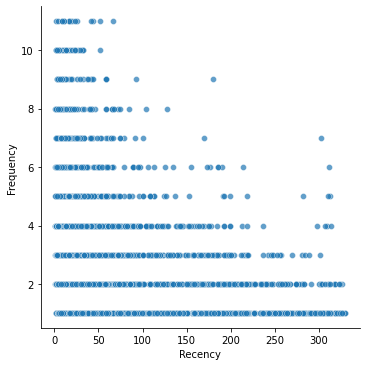

In [27]:
sns.relplot(x="Recency", y="Frequency",
           data=rfm_no_out, kind="scatter",
           alpha=0.7)
plt.show()

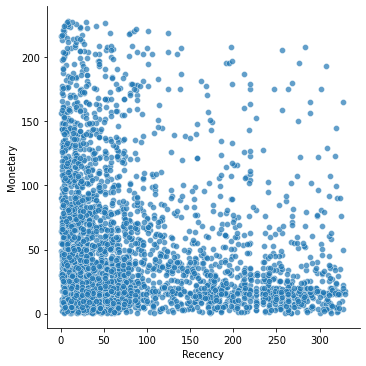

In [28]:
sns.relplot(x="Recency", y="Monetary",
           data=rfm_no_out, kind="scatter",
           alpha=0.7)
plt.show()

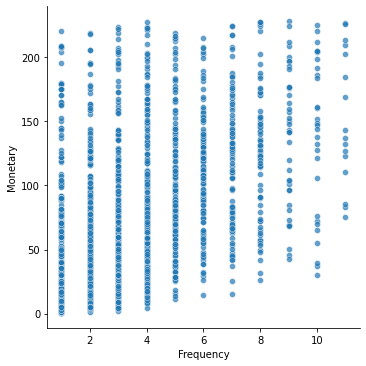

In [29]:
sns.relplot(x="Frequency", y="Monetary",
           data=rfm_no_out, kind="scatter",
           alpha=0.7)
plt.show()

### Sulla base del confronto tra i grafici generati utilizzando i due metodi (adeguamento/eliminazione) e di ulteriori prove effettuate tramite applicazione e test di algoritmi di clustering, decido di utilizzare il dataset ricavato con la tecnica dell'eliminazione degli outliers. 

## Plots

Text(0, 0.5, 'Numero di clienti')

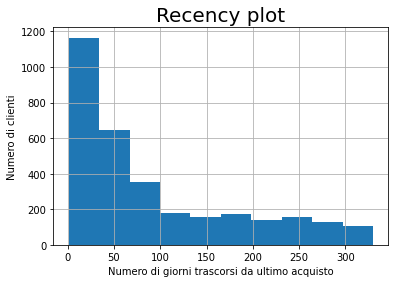

In [30]:
rfm_no_out["Recency"].hist()
plt.title('Recency plot', fontsize = 20)
plt.xlabel('Numero di giorni trascorsi da ultimo acquisto')
plt.ylabel('Numero di clienti')

Text(0, 0.5, 'Numero di clienti')

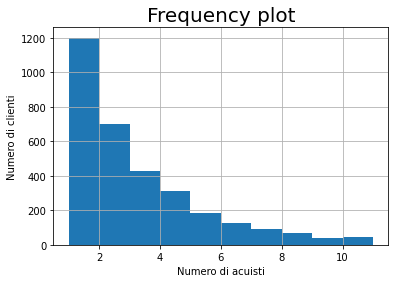

In [31]:
rfm_no_out["Frequency"].hist()
plt.title('Frequency plot', fontsize = 20)
plt.xlabel('Numero di acuisti')
plt.ylabel('Numero di clienti')

Text(0, 0.5, 'Numero di clienti')

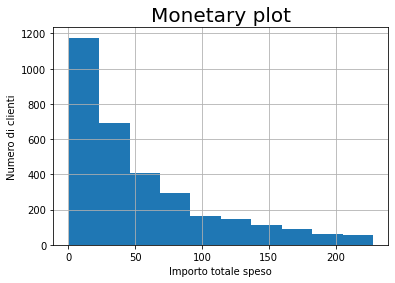

In [32]:
rfm_no_out["Monetary"].hist()
plt.title('Monetary plot', fontsize = 20)
plt.xlabel('Importo totale speso')
plt.ylabel('Numero di clienti')

In [33]:
rfm_no_out.head()

,CustomerID,Recency,Frequency,Monetary
2,12749.0,4.0,5.0,98.35
3,12820.0,4.0,4.0,58.20
4,12821.0,215.0,1.0,19.92
5,12822.0,71.0,2.0,30.80
7,12824.0,60.0,1.0,5.04


In [34]:
rfm_no_out.reset_index(drop=True, inplace=True)

In [35]:
rfm_no_out.set_index("CustomerID", inplace=True)

In [36]:
rfm_no_out.head()

,Recency,Frequency,Monetary
CustomerID,,,
12749.0,4.0,5.0,98.35
12820.0,4.0,4.0,58.20
12821.0,215.0,1.0,19.92
12822.0,71.0,2.0,30.80
12824.0,60.0,1.0,5.04


# CLUSTERING

In [37]:
from sklearn.cluster import KMeans

In [38]:
rfm = rfm_no_out[["Recency","Frequency","Monetary"]]

Al fine di scoprire le eventuali dipendenze/correlazioni tra diverse features, costruiamo la matrice di correlazione, utilizzando il coefficiente di correlazione di ***Pearson***. Tale coefficiente riporta, per ogni coppia di attributi, un valore compreso tra -1 e +1. Valori più grandi di 0.5 (in valore assoluto) implicano un grado di correlazione rilevante. Valori vicini ad 1 implicano una correlazione forte.

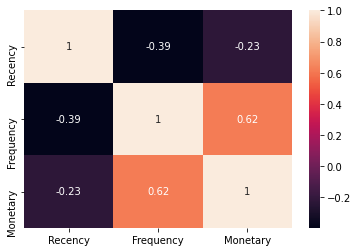

In [39]:
corrMatrix = rfm.corr(method='pearson')
sns.heatmap(corrMatrix, annot=True)
plt.show()

Dalla matrice di correlazione possiamo notare una correlazione interessante tra le features ***Frequency*** e ***Monetary***. Eliminando la feature recency si ottengono tuttavia risultati molto simili a quelli ottenuti utilizzando il dataset completo, inoltre l'algoritmo ha un ottimo risultato per le features _Recency x Monetary_. Decido quindi di mantenere le tre features.

Al fine di calcolare il numero di clusters in cui è consigliato suddividere il nostro dataset, ci affidiamo all'***elbow method*** basato sulla curva di inerzia, considerando che per l'analisi RFM, di solito si utilizza un numero di clusters almeno pari a ***4***.

In [40]:
objective_function=[] 
for i in range(1,11):
    clustering=KMeans(n_clusters=i, init='k-means++')
    clustering.fit(rfm_no_out)
    objective_function.append(clustering.inertia_)
objective_function

[34240444.85779739,
 13275235.31311297,
 8202715.27214186,
 5869628.919122914,
 4857621.682090803,
 4018785.8684254633,
 3253421.011223916,
 2888927.654946221,
 2575932.773523536,
 2270582.534941095]

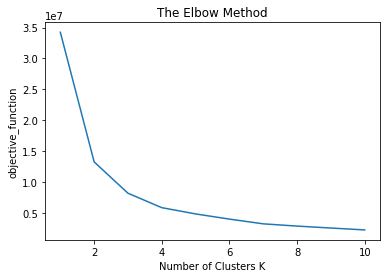

In [41]:
# uso la tecnica dell'elbow per individuare il numero ottimale di clusters
# Tale tecnica rappresenta il grafico tra il numero di clusters e la funzione
#obiettivo prenderemo quindi un valore di k in cui c'è un elbow più definito
plt.plot(range(1,11),objective_function)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('objective_function')
plt.show()

Il metodo utilizzato ci consente di stabilire, attraverso un approccio visivo, che il numero ideale di clusters in cui suddividere il nostro dataset è compreso tra 2 e 4. Dato che, di solito, la tecnica RFM prevede la suddivisione in almeno 4 categorie, si è deciso di passare all'algoritmo un numero di clusters pari a 4.

In [42]:
model = KMeans(n_clusters = 4, init='k-means++',
               random_state=0)
ClusterID = model.fit_predict(rfm)
rfm_no_out["ClusterID"] = ClusterID
rfm_no_out

,Recency,Frequency,Monetary,ClusterID
CustomerID,,,,
12749.0,4.0,5.0,98.35,3
12820.0,4.0,4.0,58.20,2
12821.0,215.0,1.0,19.92,1
12822.0,71.0,2.0,30.80,2
12824.0,60.0,1.0,5.04,2
...,...,...,...,...
18278.0,74.0,1.0,17.00,2
18280.0,278.0,1.0,23.70,1
18281.0,181.0,1.0,5.04,0


In [43]:
from sklearn import metrics

metrics.silhouette_score(rfm_no_out, rfm_no_out.ClusterID,
                         metric='euclidean')

0.4895324795773005

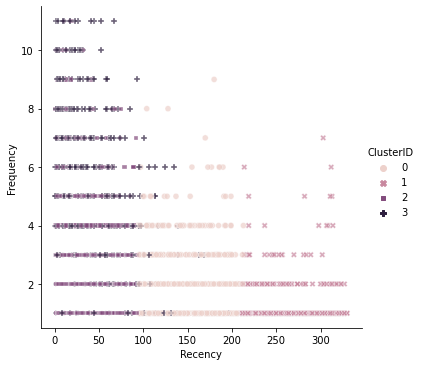

In [44]:
sns.relplot(x="Recency", y="Frequency",
           data=rfm_no_out, kind="scatter",
           hue="ClusterID", style="ClusterID", alpha=0.7)
plt.show()

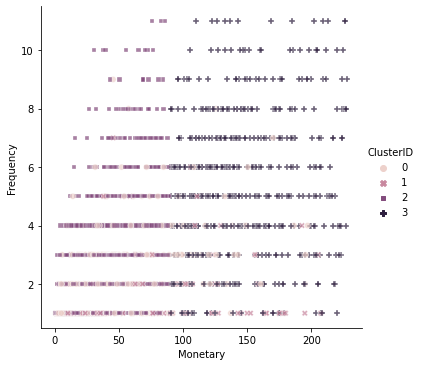

In [45]:
sns.relplot(x="Monetary", y="Frequency",
           data=rfm_no_out, kind="scatter",
           hue="ClusterID", style="ClusterID", alpha=0.7)
plt.show()

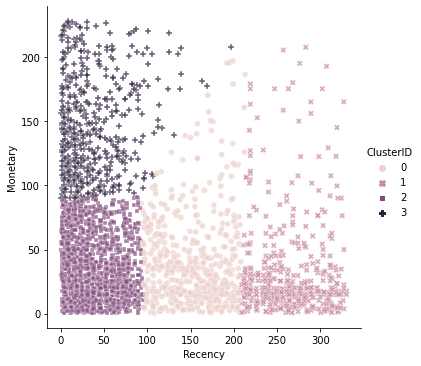

In [46]:
sns.relplot(x="Recency", y="Monetary",
           data=rfm_no_out, kind="scatter",
           hue="ClusterID", style="ClusterID", alpha=0.7)
plt.show()

# RISULTATI

I 4 clusters individuati, nonostante alcune sovrapposizioni, portano ad una buona categorizzazione dei dati, e soprattutto ci consentono di individuare facilmente le categorie di nostro interesse, cioè i ***Best Customers***, che appartengono al cluster ***3*** (elevato numero di acquisti e di spesa, ultimo acquisto molto recente),  ed i ***Loyal Customers***, appartenenti al cluster ***2***(ultimo acquisto molto recente, numero di acquisti e valore di spesa rilevanti). Per quanto riguarda il cluster ***1***, esso rappresenta i clienti ***Dormienti*** cioè che non svolgono nessuna attività sul sito da molto tempo, mentre il cluster ***0*** rappresenta i clienti ***A rischio***, cioè coloro che non sono ancora dormienti ma potrebbero diventarlo, e quindi necessitano di attenzioni.

Una buona strategia di marketing potrebbe prevedere:
- ***Best Customers***: L'invio di prodotti omaggio selezionati in base ai clienti, per premiare la fedeltà del cliente ed invogliare l'acquisto di tali prodotti, o ***l'applicazione di prezzi speciali su prodotti consigliati per coloro che hanno una alta tendenza ad acquistare grandi quantità di merce a prezzi scontati*** (task su cui ci concentreremo dal prossimo notebook).

- ***Loyal Customers, Potential Loyalist***: Soluzioni che incentivano ad aumentare il costo del carrello (quindi l'invio di materiale pubblicitario e pubblicità mirata, no sconti, no offerte, a meno che non si consideri una soglia minima di spesa per accedervi)

- ***A rischio, Dormienti***: L'invio di offerte speciali sull'acquisto di determinati prodotti, per provare a far tornare una parte di tali clienti sulla piattaforma con la speranza di fidelizzarne alcuni.

In [47]:
km_cluster_Sale = rfm_no_out.groupby("ClusterID"
                                    ).Monetary.mean()
km_cluster_Recency = rfm_no_out.groupby("ClusterID"
                                       ).Recency.mean()
km_cluster_Frequency = rfm_no_out.groupby("ClusterID"
                                         ).Frequency.mean()

<AxesSubplot:ylabel='Recency'>

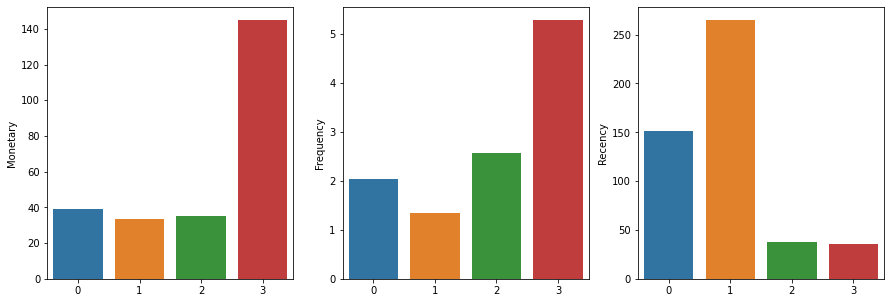

In [48]:
import seaborn as sns
fig, axs = plt.subplots(1,3, figsize = (15,5))
sns.barplot(x = [0,1,2,3], y= km_cluster_Sale,ax = axs[0])
sns.barplot(x = [0,1,2,3], y= km_cluster_Frequency,ax = axs[1])
sns.barplot(x = [0,1,2,3], y= km_cluster_Recency,ax = axs[2])

In [49]:
best_customers = rfm_no_out[rfm_no_out['ClusterID']==3]
best_customers.sort_values(by='Monetary', ascending=False).head()

,Recency,Frequency,Monetary,ClusterID
CustomerID,,,,
14309.0,9.0,9.0,228.00,3
16126.0,30.0,4.0,227.40,3
15861.0,13.0,8.0,227.27,3
17567.0,8.0,8.0,226.94,3
14776.0,52.0,11.0,226.38,3


In [50]:
best_customers.describe()

,Recency,Frequency,Monetary,ClusterID
count,550.000000,550.000000,550.000000,550.0
mean,35.503636,5.280000,144.972909,3.0
std,31.544212,2.536035,38.007766,0.0
min,1.000000,1.000000,89.940000,3.0
25%,11.000000,3.000000,113.527500,3.0
50%,25.500000,5.000000,138.040000,3.0
75%,53.000000,7.000000,174.587500,3.0
max,197.000000,11.000000,228.000000,3.0


In [51]:
loyal_customers = rfm_no_out[rfm_no_out['ClusterID']==2]
loyal_customers.sort_values(by='Monetary',
                            ascending=False).head()

,Recency,Frequency,Monetary,ClusterID
CustomerID,,,,
16036.0,88.0,2.0,90.84,2
14307.0,89.0,6.0,90.12,2
15576.0,38.0,1.0,90.00,2
17313.0,32.0,1.0,90.00,2
14124.0,85.0,1.0,90.00,2


In [52]:
loyal_customers.describe()

,Recency,Frequency,Monetary,ClusterID
count,1608.000000,1608.000000,1608.000000,1608.0
mean,37.428483,2.564677,35.308539,2.0
std,25.080701,1.768365,24.568660,0.0
min,1.000000,1.000000,0.390000,2.0
25%,17.000000,1.000000,15.000000,2.0
50%,32.000000,2.000000,30.660000,2.0
75%,58.000000,3.000000,52.942500,2.0
max,95.000000,11.000000,90.840000,2.0


In [53]:
best_customers.to_csv('best_customers.csv')

In [54]:
rfm.to_csv('rfm.csv')

### Ai fini del completamento del task prefissato, esportiamo il dataset relativo ai best customers, tali clienti verranno quindi ulteriormente analizzati al fine di scovare coloro che hanno una alta propensione all'acquisto di grandi quantità di merce a prezzi scontati. In ultimo, tramite l'utilizzo di un algoritmo di scoperta di pattern frequenti e regole di associazione, andremo ad individuare dei prodotti di cui consigliare l'acquisto per ogni singolo cliente considerato, proponendolo ad un prezzo scontato, per l'acquisto di almeno una determinata quantità.